In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:/Users/user/Downloads/upvote_train.csv")

In [3]:
df.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [4]:
df.shape

(330045, 7)

In [5]:
# Transform the tag variable into numerical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [6]:
df['Tag']=le.fit_transform(df['Tag'])

In [7]:
df_x=df.iloc[:,1:6]
df_y=df.iloc[:,-1]

In [8]:
df_y

0           42.0
1         1175.0
2           60.0
3            9.0
4           83.0
           ...  
330040       0.0
330041      73.0
330042      15.0
330043       3.0
330044      37.0
Name: Upvotes, Length: 330045, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df_xtrain,df_xtest,df_ytrain,df_ytest=train_test_split(df_x,df_y,test_size=0.2,random_state=101)

In [11]:
df_xtrain.shape,df_xtest.shape,df_ytrain.shape,df_ytest.shape

((264036, 5), (66009, 5), (264036,), (66009,))

In [12]:
test=pd.read_csv("C:/Users/user/Downloads/upvote_test.csv")

In [13]:
test['Tag']=le.fit_transform(test['Tag'])

In [14]:
test_x=test.iloc[:,1:]
test_x

,Tag,Reputation,Answers,Username,Views
0,0,5645.0,3.0,50652,33200.0
1,1,24511.0,6.0,37685,2730.0
2,3,927.0,1.0,135293,21167.0
3,3,21.0,6.0,166998,18528.0
4,3,4475.0,10.0,53504,57240.0
...,...,...,...,...,...
141443,4,4681.0,4.0,152060,2469.0
141444,4,7782.0,3.0,89235,18998.0
141445,6,435.0,5.0,119788,57048.0
141446,5,176.0,3.0,86824,10193.0


In [15]:
from sklearn import linear_model
ln=linear_model.LinearRegression()

In [18]:
p1=ln.predict(df_xtest)

In [19]:
RSQ1=ln.score(df_xtrain,df_ytrain)
RSQ1

0.2693094638108968

In [20]:
ADJRSQ1=1-(((1-RSQ1)*(264036-1))/(264036-4-1))
ADJRSQ1

0.26929839404202593

In [21]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score

In [22]:
df_mse1=metrics.mean_squared_error(df_ytest,p1)
df_mse1

12758227.66876462

In [23]:
ln.score(df_xtrain,df_ytrain)

0.2693094638108968

In [24]:
df.skew()

ID            -0.000298
Tag            0.337230
Reputation    11.230027
Answers        3.380169
Username       0.142088
Views         14.370704
Upvotes       74.249689
dtype: float64

# Model

In [25]:
ln.fit(df_x,df_y)

LinearRegression()

In [26]:
p1=ln.predict(test_x)

In [27]:
import matplotlib.pyplot as plt

<AxesSubplot:>

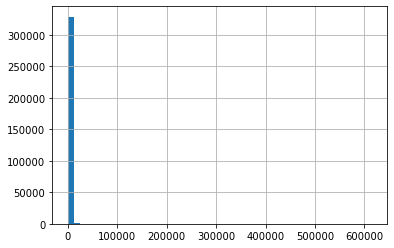

In [28]:
df.Upvotes.hist(bins=50)

In [29]:
df.Upvotes.describe()

count    330045.000000
mean        337.505358
std        3592.441135
min           0.000000
25%           8.000000
50%          28.000000
75%         107.000000
max      615278.000000
Name: Upvotes, dtype: float64

In [30]:
#TREAT SKEWNESS
#df.Upvotes=np.sqrt(df.Upvotes)

# Treat Outliers

In [31]:
IQR1=df.Upvotes.quantile(0.75)-df.Upvotes.quantile(0.25)
IQR1

99.0

In [32]:
Q1=df.Upvotes.quantile(0.25)-(3*IQR1)
Q3=df.Upvotes.quantile(0.75)+(3*IQR1)

In [33]:
print(Q1,Q3)

-289.0 404.0


In [34]:
df.loc[df['Upvotes']>404,'Upvotes'] = 404


In [35]:
df.Reputation.describe()

count    3.300450e+05
mean     7.773147e+03
std      2.706141e+04
min      0.000000e+00
25%      2.820000e+02
50%      1.236000e+03
75%      5.118000e+03
max      1.042428e+06
Name: Reputation, dtype: float64

<AxesSubplot:>

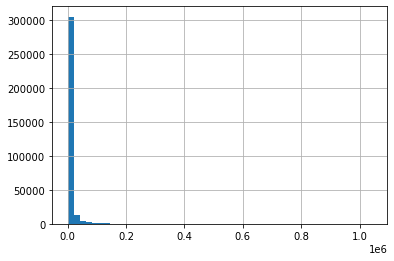

In [36]:
df.Reputation.hist(bins=50)

In [37]:
IQR2=df.Reputation.quantile(0.75)-df.Reputation.quantile(0.25)
IQR2

4836.0

In [38]:
Q11=df.Reputation.quantile(0.25)-(3*IQR2)
Q31=df.Reputation.quantile(0.75)+(3*IQR2)

In [39]:
print(Q11,Q31)

-14226.0 19626.0


In [40]:
df.loc[df['Reputation']>19626,'Reputation'] =19626

<AxesSubplot:>

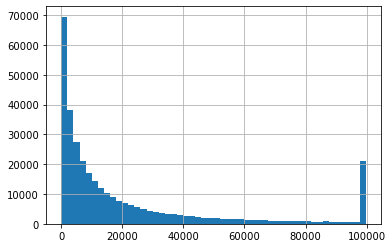

In [47]:
df.Views.hist(bins=50)

In [42]:
IQR3=df.Views.quantile(0.75)-df.Views.quantile(0.25)
IQR3

24276.0

In [43]:
Q12=df.Views.quantile(0.25)-(3*IQR3)
Q33=df.Views.quantile(0.75)+(3*IQR3)

In [44]:
print(Q12,Q33)

-70234.0 99698.0


In [45]:
df.loc[df['Views']>99698,'Views'] =99698

<AxesSubplot:>

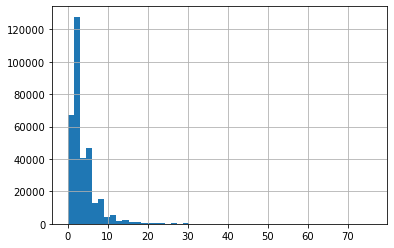

In [46]:
df.Answers.hist(bins=50)

In [48]:
IQR4=df.Answers.quantile(0.75)-df.Answers.quantile(0.25)
IQR4

3.0

In [49]:
Q13=df.Answers.quantile(0.25)-(3*IQR4)
Q34=df.Answers.quantile(0.75)+(3*IQR4)

In [50]:
print(Q13,Q34)

-7.0 14.0


In [51]:
df.loc[df['Answers']>14,'Answers'] = 14

# Treat Skewness

In [52]:
df['Answers']=np.sqrt(df.Answers)
df['Views']=np.sqrt(df.Views)
df['Upvotes']=np.sqrt(df.Upvotes)

# For Negative Skewness (Square Transformation Method)

In [53]:
df.skew()

ID           -0.000298
Tag           0.337230
Reputation    1.661066
Answers       0.716192
Username      0.142088
Views         0.923451
Upvotes       1.006788
dtype: float64

# 1. Linear Regression

In [54]:
df.shape

(330045, 7)

In [55]:
df_x=df.iloc[:,1:6]
df_y=df.iloc[:,-1]

In [56]:
df_xtrain,df_xtest,df_ytrain,df_ytest=train_test_split(df_x,df_y,test_size=0.2,random_state=101)

In [57]:
df_xtrain.shape,df_xtest.shape,df_ytrain.shape,df_ytest.shape

((264036, 5), (66009, 5), (264036,), (66009,))

In [58]:
ln.fit(df_xtrain,df_ytrain)

LinearRegression()

In [59]:
p1=ln.predict(df_xtest)

In [60]:
RSQ1=ln.score(df_xtrain,df_ytrain)
RSQ1

0.7513974696226831

In [61]:
ADJRSQ1=1-(((1-RSQ1)*(264036-1))/(264036-4-1))
ADJRSQ1

0.7513937033599278

In [62]:
df_mse1=metrics.mean_squared_error(df_ytest,p1)
df_mse1

8.994043184433597

In [63]:
ln.score(df_xtrain,df_ytrain)

0.7513974696226831

# 2. Lasso

In [64]:
from sklearn.linear_model import Lasso

In [65]:
l=Lasso()

In [66]:
l.fit(df_xtrain,df_ytrain)

Lasso()

In [67]:
l.coef_

array([-0.00000000e+00,  5.67771426e-04,  0.00000000e+00, -1.55095542e-06,
        4.12599020e-02])

In [68]:
pr2=l.predict(df_xtest)
pr2

array([13.22002149, 24.33027354,  2.17035445, ...,  3.50157956,
        7.98832617,  4.405539  ])

In [69]:
print(r2_score(df_ytest,pr2))

0.7490139996984909


In [70]:
df_mse2=metrics.mean_squared_error(df_ytest,pr2)
df_mse2

9.036560781311767

# Non Linear Regression Model

# 3.XG Boosting

In [71]:
from xgboost import XGBRFRegressor
xgb = XGBRFRegressor()

In [72]:
xgb.fit(df_xtrain,df_ytrain)

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='', max_bin=256,
               max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=100,
               objective='reg:squarederror', predictor='auto', random_state=0,
               reg_alpha=0, sampling_method='uniform', scale_pos_weight=1, ...)

In [73]:
pr3=xgb.predict(df_xtest)
pr3

array([14.961753 , 20.03862  ,  2.8233383, ...,  3.5192564,  9.8528185,
        4.228319 ], dtype=float32)

In [74]:
rsq_xg=xgb.score(df_xtrain,df_ytrain)
rsq_xg

0.8620461179654936

In [75]:
adj_xg=1-(((1-rsq_xg)*(264036-1))/(264036-5-1))
adj_xg

0.8620435054994474

In [76]:
df_mse_xg=metrics.mean_squared_error(df_ytest,pr3)
df_mse_xg

5.116777105994776

# 4.K-Nearest Neighbor Regression

In [77]:
from sklearn.neighbors import KNeighborsRegressor
knn =  KNeighborsRegressor(n_neighbors = 10)

In [78]:
knn.fit(df_xtrain,df_ytrain)

KNeighborsRegressor(n_neighbors=10)

In [81]:
pr4=knn.predict(df_xtest)

In [82]:
RSQ4=knn.score(df_xtrain,df_ytrain)
RSQ4

0.7452169555181265

In [83]:
adj_knn=1-(((1-RSQ4)*(264036-1))/(264036-5-1))
adj_knn

0.7452121306299607

In [84]:
df_mse_knn=metrics.mean_squared_error(df_ytest,pr4)
df_mse_knn

11.620438041010932

In [85]:
error1=df_ytest-pr4
aerror1=np.abs(error1)

In [86]:
MAPE1=np.mean(aerror1/df_ytest)*100
MAPE1

inf

# Predicton on Test Data

In [96]:
test.head(3)

,ID,Tag,Reputation,Answers,Username,Views
0,366953,0,5645.0,3.0,50652,33200.0
1,71864,1,24511.0,6.0,37685,2730.0
2,141692,3,927.0,1.0,135293,21167.0


In [135]:
test_x

,Tag,Reputation,Answers,Username,Views
0,0,5645.0,3.0,50652,33200.0
1,1,19629.0,6.0,37685,2730.0
2,3,927.0,1.0,135293,21167.0
3,3,21.0,6.0,166998,18528.0
4,3,4475.0,10.0,53504,57240.0
...,...,...,...,...,...
141443,4,4681.0,4.0,152060,2469.0
141444,4,7782.0,3.0,89235,18998.0
141445,6,435.0,5.0,119788,57048.0
141446,5,176.0,3.0,86824,10193.0


In [136]:
pr_test=knn.predict(test_x)

In [137]:
sub=pd.DataFrame({'ID':test['ID'],'Upvotes':pr_test})

In [139]:
#sub.to_csv('Upvote_Prediction_Pro1.csv',index=True)

In [104]:
sub.value_counts()

ID      Upvotes  
7       18.289312    1
314279  6.128151     1
314261  18.834279    1
314263  5.058250     1
314265  4.438911     1
                    ..
157009  19.968606    1
157007  8.755845     1
157005  6.732985     1
157004  7.971438     1
471488  12.003052    1
Length: 141448, dtype: int64

In [134]:
test_x.skew()

Tag           0.332509
Reputation    1.652990
Answers       1.251327
Username      0.147448
Views         1.721822
dtype: float64

<AxesSubplot:>

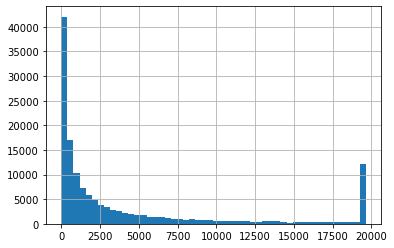

In [115]:
test_x.Reputation.hist(bins=50)

In [107]:
test_x.Reputation.describe()

count    1.414480e+05
mean     7.920927e+03
std      2.791072e+04
min      0.000000e+00
25%      2.860000e+02
50%      1.245000e+03
75%      5.123000e+03
max      1.042428e+06
Name: Reputation, dtype: float64

In [108]:
IQR1_test=test.Reputation.quantile(0.75)-test.Reputation.quantile(0.25)
IQR1_test

4837.0

In [109]:
Q1=df.Reputation.quantile(0.25)-(3*IQR1_test)
Q3=df.Reputation.quantile(0.75)+(3*IQR1_test)

In [110]:
print(Q1,Q3)

-14229.0 19629.0


In [114]:
test_x.loc[test_x['Reputation']>19629,'Reputation'] =19629

<AxesSubplot:>

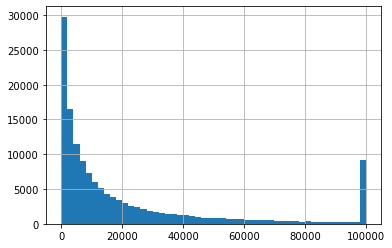

In [122]:
test_x.Views.hist(bins=50)

In [118]:
IQR2_test=test_x.Views.quantile(0.75)-test_x.Views.quantile(0.25)
IQR2_test

24381.25

In [119]:
Q1=test_x.Views.quantile(0.25)-(3*IQR3)
Q3=test_x.Views.quantile(0.75)+(3*IQR3)

In [120]:
print(Q1,Q3)

-70220.0 99817.25


In [121]:
test_x.loc[test_x['Views']>99817.25,'Views'] =99817.25

<AxesSubplot:>

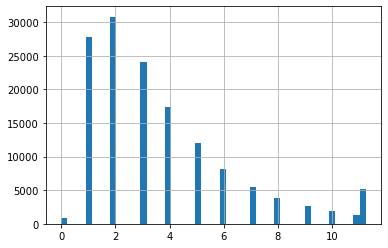

In [133]:
test_x.Answers.hist(bins=50)

In [129]:
IQR3_test=test_x.Answers.quantile(0.75)-test_x.Answers.quantile(0.25)
IQR3_test

3.0

In [130]:
Q1=df.Answers.quantile(0.25)-(3*IQR3_test)
Q3=df.Answers.quantile(0.75)+(3*IQR3_test)

In [131]:
print(Q1,Q3)

-7.585786437626905 11.23606797749979


In [132]:
test_x.loc[test_x['Answers']>11.236,'Answers'] = 11.236

In [140]:
sub

,ID,Upvotes
0,366953,19.012322
1,71864,20.099751
2,141692,13.590008
3,316833,6.613783
4,440445,19.120392
...,...,...
141443,47187,19.587287
141444,329126,20.099751
141445,282334,9.643324
141446,386629,9.561035
